In [16]:
import sys
import os.path
import cv2

In [17]:

# Implementar la tarea:
#  1-leer imágenes en dir_dataset_r
#  2-calcular descriptores de imágenes
#  3-crear dir_datos_temporales con: os.makedirs(dir_datos_temporales, exist_ok=True)
#  4-escribir en dir_datos_temporales los descriptores

In [18]:
# crea una lista de imagenes jpg desde una carpeta y sus subcarpetas, solo cuando el nombre de la imagen comienza con 'r':
def get_imagenes(carpeta):
    imagenes = []
    for root, dirs, files in os.walk(carpeta):
        for file in files:
            if file.endswith('.jpg') and file.startswith('r'):
                imagenes.append(os.path.join(root, file))
    return imagenes

jpgs = get_imagenes('dataset_tarea1')
len(jpgs)

14658

In [19]:
def HOG(jpgs):

    # get hog descriptor for all images in jpgs:
    win_size = (64, 128)  # Tamaño de la ventana de detección en píxeles (ancho, alto)
    block_size = (16, 16)  # Tamaño de un bloque en píxeles (ancho, alto)
    block_stride = (8, 8)  # Desplazamiento de los bloques en píxeles (ancho, alto)
    cell_size = (8, 8)  # Tamaño de una celda en píxeles (ancho, alto)
    nbins = 9  # Número de bins (divisiones) en el histograma de gradientes

    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    hog_descriptors = []

    #N= 100
    N= len(jpgs)

    for jpg in jpgs[0:N]:
        #count iterations and print:
        img = cv2.imread(jpg)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (64, 128))
        hog_descriptors.append(hog.compute(img))
        if jpgs.index(jpg) % 500 == 0:
            print(jpgs.index(jpg))

    return hog_descriptors

In [20]:
hog_descriptors = HOG(jpgs)
hog_descriptors[0].shape

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500


(3780,)

In [21]:
#crear dir_datos_temporales con: os.makedirs(dir_datos_temporales, exist_ok=True)
dir_datos_R = 'datos_R'
os.makedirs(dir_datos_R, exist_ok=True)

#escribir un archivo csv con los descriptores en dir_datos_temporales y el nombre del archivo .jpg:

import csv

with open(dir_datos_R + '/descriptores.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=';')
    for i in range(N):
        writer.writerow([jpgs[i], list(hog_descriptors[i])])



In [22]:
#leer el archivo csv y mostrar los descriptores de la primera imagen:

import csv

with open(dir_datos_R + '/descriptores.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        print(row[0])
        print(row[1])
        break



dataset_tarea1/dataset_a/r/r1571.jpg
[0.035787486, 0.24801134, 0.24801134, 0.124584384, 0.038938504, 0.0022991125, 0.00023438205, 0.0002960718, 0.002990848, 0.23658538, 0.24801134, 0.23698734, 0.08498039, 0.071079664, 0.027271714, 0.04645451, 0.122878894, 0.15568997, 0.013841299, 0.22267929, 0.23660491, 0.24801134, 0.18135947, 0.14827417, 0.15941244, 0.087053165, 0.029537043, 0.18591829, 0.24801134, 0.24801134, 0.14992386, 0.13609537, 0.07269812, 0.21239828, 0.24801134, 0.24801134, 0.2039322, 0.18927972, 0.089990295, 0.04636772, 0.09244395, 0.050980233, 0.10216632, 0.21946391, 0.19086322, 0.2299866, 0.2299866, 0.21506947, 0.07882486, 0.12401815, 0.08021241, 0.11649853, 0.2299866, 0.2299866, 0.17770158, 0.2299866, 0.14014909, 0.02899895, 0.068629555, 0.04900668, 0.15654057, 0.2299866, 0.1990433, 0.22232193, 0.2299866, 0.2299866, 0.105038434, 0.15793698, 0.09176747, 0.11712727, 0.22630435, 0.10393839, 0.22473764, 0.22473764, 0.17291723, 0.09623101, 0.17550525, 0.21158445, 0.15395878, 0.2

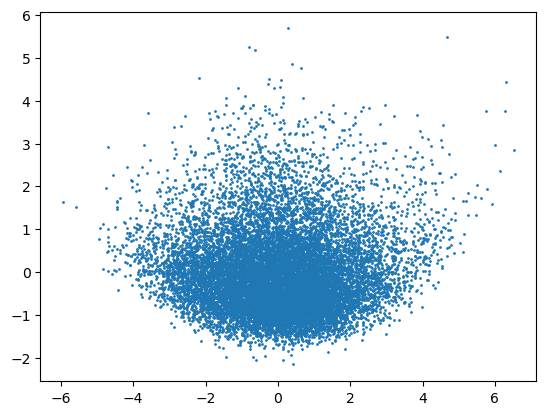

In [23]:
#hacer analisis pca sobre los descriptores que estan en la lista hog_descriptors:

import numpy as np
from sklearn.decomposition import PCA

hog_descriptors = np.array(hog_descriptors)
hog_descriptors = hog_descriptors.reshape(N, 3780)

pca = PCA(n_components=2)
pca.fit(hog_descriptors)
hog_descriptors_pca = pca.transform(hog_descriptors)

hog_descriptors_pca.shape

#plot pca results:

import matplotlib.pyplot as plt

plt.scatter(hog_descriptors_pca[:, 0], hog_descriptors_pca[:, 1], s=1)
plt.show()
